In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


### 1. Loading Data

In [2]:
# declaring dataframe

sales_item = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
sales_item_category = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
sales_shops = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
sales_train =  pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv', parse_dates=['date'], 
                    dtype={'date': 'str', 'date_block_num': 'int32', 'shop_id': 'int32','item_id': 'int32', 'item_price': 'float32', 'item_cnt_day': 'int32'})
sales_test =  pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')


In [3]:
#checking the file

print(sales_item.shape)
print(sales_item_category.shape)
print(sales_shops.shape)
print(sales_train.shape)
print(sales_test.shape)

(22170, 3)
(84, 2)
(60, 2)
(2935849, 6)
(214200, 3)


In [4]:
print("Items : \n",sales_item.head())
print("Item Category : \n",sales_item_category.head())
print("Shops : \n",sales_shops.head())
print("Train : \n",sales_train.head())
print("Test : \n",sales_test.head())

Items : 
                                            item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
Item Category : 
         item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
Shops : 
                         shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"       

In [5]:
# checking null value

print("Items : \n",sales_item.isnull().sum())
print("Item Category : \n",sales_item_category.isnull().sum())
print("Shops : \n",sales_shops.isnull().sum())
print("Train : \n",sales_train.isnull().sum())
print("Test : \n",sales_test.isnull().sum())

Items : 
 item_name           0
item_id             0
item_category_id    0
dtype: int64
Item Category : 
 item_category_name    0
item_category_id      0
dtype: int64
Shops : 
 shop_name    0
shop_id      0
dtype: int64
Train : 
 date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
Test : 
 ID         0
shop_id    0
item_id    0
dtype: int64


In [6]:
# duplicate counts in train dataset

print('Duplicates in Train : ',len(sales_train[sales_train.duplicated()]))

Duplicates in Train :  6


In [7]:
sales_train[sales_train.duplicated()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,2013-05-01,0,54,20130,149.0,1
1435367,2014-02-23,13,50,3423,999.0,1
1496766,2014-03-23,14,21,3423,999.0,1
1671873,2014-01-05,16,50,3423,999.0,1
1866340,2014-12-07,18,25,3423,999.0,1
2198566,2014-12-31,23,42,21619,499.0,1


In [8]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int32         
 2   shop_id         int32         
 3   item_id         int32         
 4   item_price      float32       
 5   item_cnt_day    int32         
dtypes: datetime64[ns](1), float32(1), int32(4)
memory usage: 78.4 MB


In [9]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.906234e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.726440e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


We are downcasting dataframe to save memories

In [10]:
def datatype_downcast(df):
    float_col= [i for i in df if df[i].dtype == 'float64']
    int_col = [i for i in df if df[i].dtype in ['int64','int32']]
    df[float_col] = df[float_col].astype(np.float32)
    df[int_col] = df[int_col].astype(np.int16)
    return df

sales_train = datatype_downcast(sales_train)

sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int16         
 2   shop_id         int16         
 3   item_id         int16         
 4   item_price      float32       
 5   item_cnt_day    int16         
dtypes: datetime64[ns](1), float32(1), int16(4)
memory usage: 56.0 MB


In [11]:
sales_dataset = sales_train.copy()

In [12]:
sales_dataset[sales_dataset['item_cnt_day'] == 2169.0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,2015-10-28,33,12,11373,0.908714,2169


In [13]:
sales_monthly = sales_dataset.groupby(['date_block_num','shop_id','item_id'])['date','item_price','item_cnt_day'].agg({'date':['mean','max'],'item_price':'mean','item_cnt_day':'sum'})


In [14]:
sales_monthly.head()

date            item_price  \
                                              mean        max       mean   
date_block_num shop_id item_id                                             
0              0       32      2013-02-03 06:00:00 2013-03-01      221.0   
                       33      2013-02-04 00:00:00 2013-03-01      347.0   
                       35      2013-01-31 00:00:00 2013-01-31      247.0   
                       43      2013-01-31 00:00:00 2013-01-31      221.0   
                       51      2013-01-22 00:00:00 2013-01-31      128.5   

                               item_cnt_day  
                                        sum  
date_block_num shop_id item_id               
0              0       32                 6  
                       33                 3  
                       35                 1  
                       43                 1  
                       51                 2

In [15]:
sales_monthly.columns

MultiIndex([(        'date', 'mean'),
            (        'date',  'max'),
            (  'item_price', 'mean'),
            ('item_cnt_day',  'sum')],
           )

### 2.EDA

<AxesSubplot:xlabel='date_block_num'>

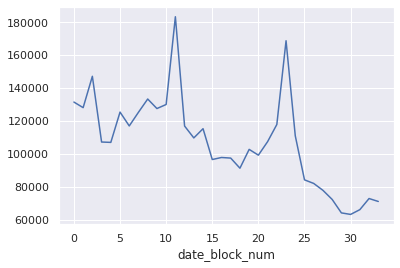

In [16]:
monthly_sales = sales_dataset.groupby(['date_block_num'])['item_cnt_day'].sum()
monthly_sales.plot()

<AxesSubplot:>

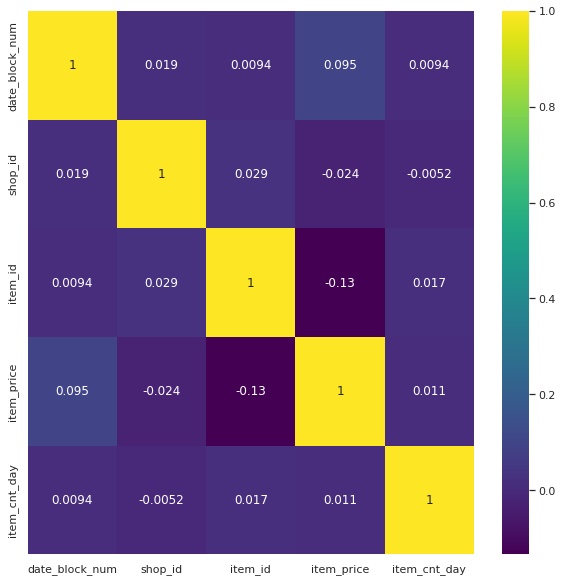

In [17]:
plt.figure(figsize=(10,10))

sns.heatmap(sales_dataset.corr(),cmap='viridis',annot=True)

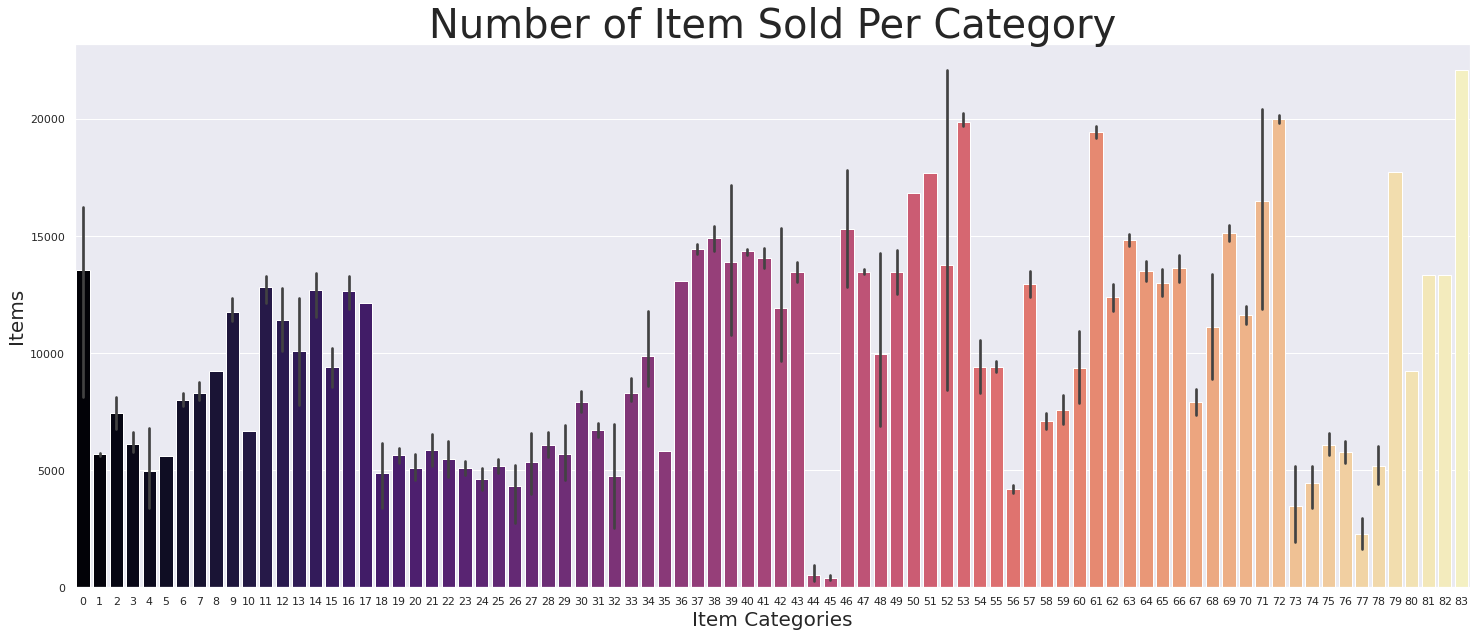

In [18]:
plt.rcParams['figure.figsize'] = (25, 10)
sns.barplot(sales_item['item_category_id'],sales_item['item_id'],palette='magma')
plt.title('Number of Item Sold Per Category', fontsize = 40)
plt.xlabel('Item Categories', fontsize = 20)
plt.ylabel('Items', fontsize = 20)
plt.show()

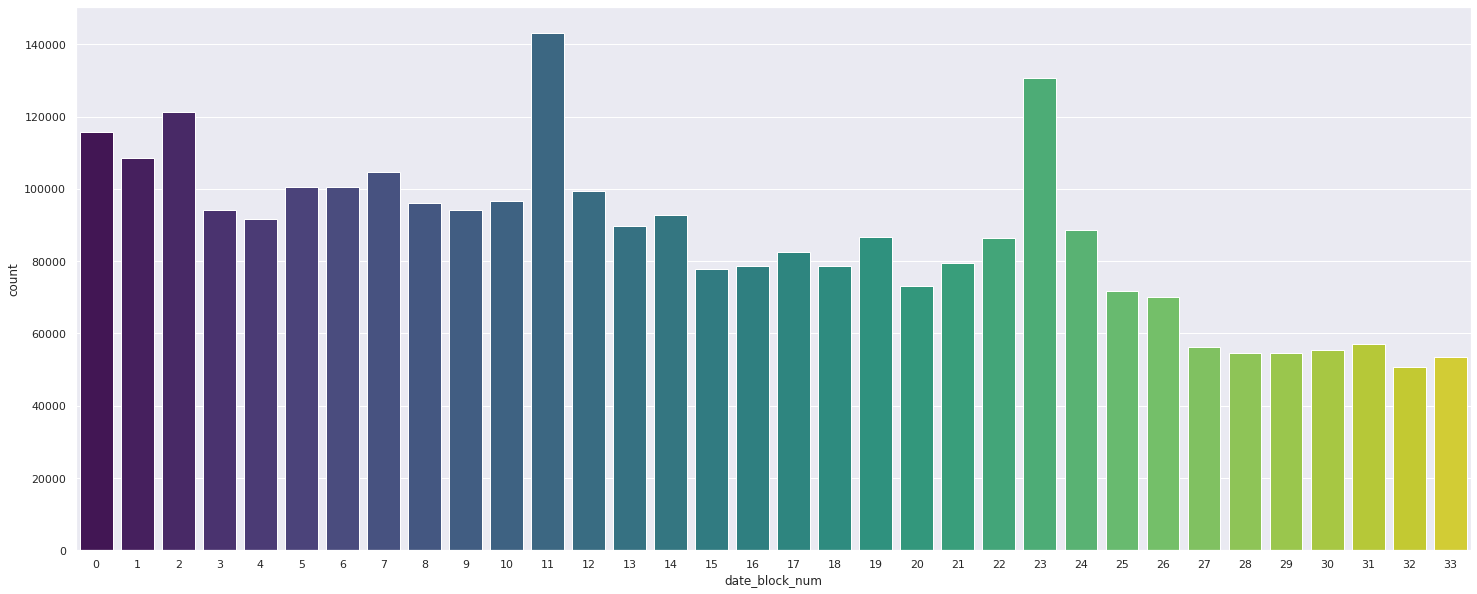

In [19]:
sns.countplot(sales_dataset['date_block_num'],palette='viridis')
plt.show()

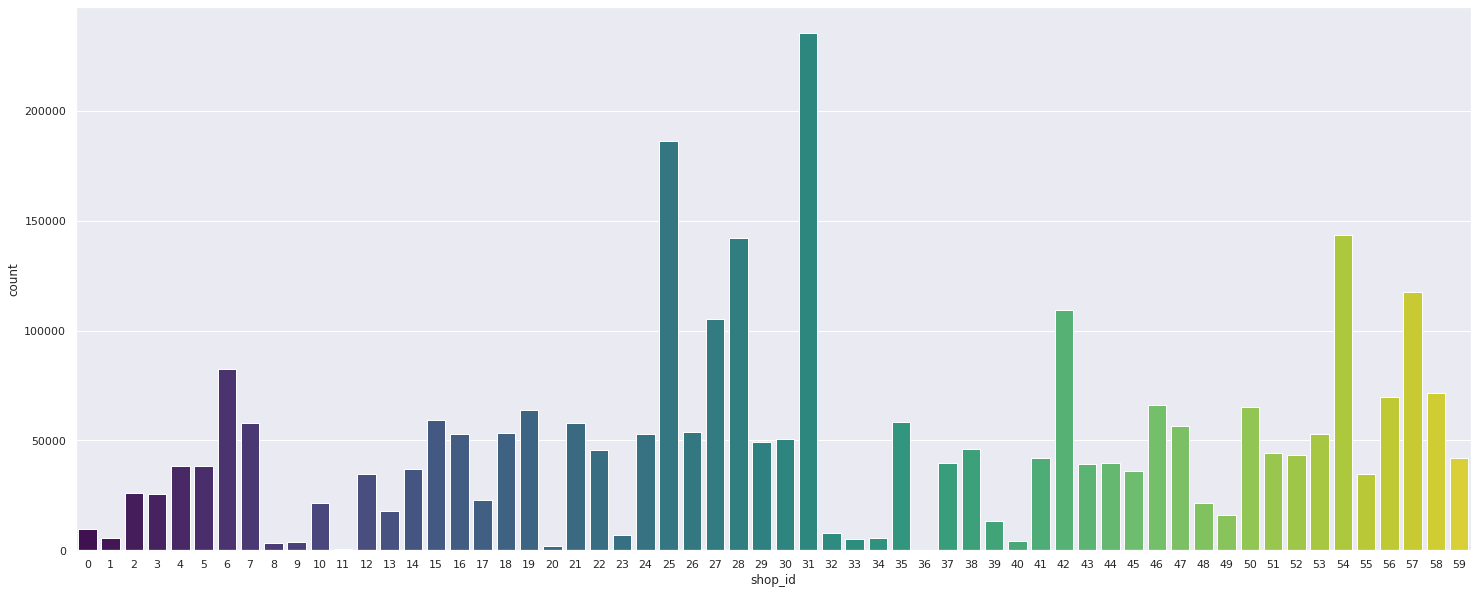

In [20]:
sns.countplot(sales_dataset['shop_id'],palette='viridis')
plt.show()

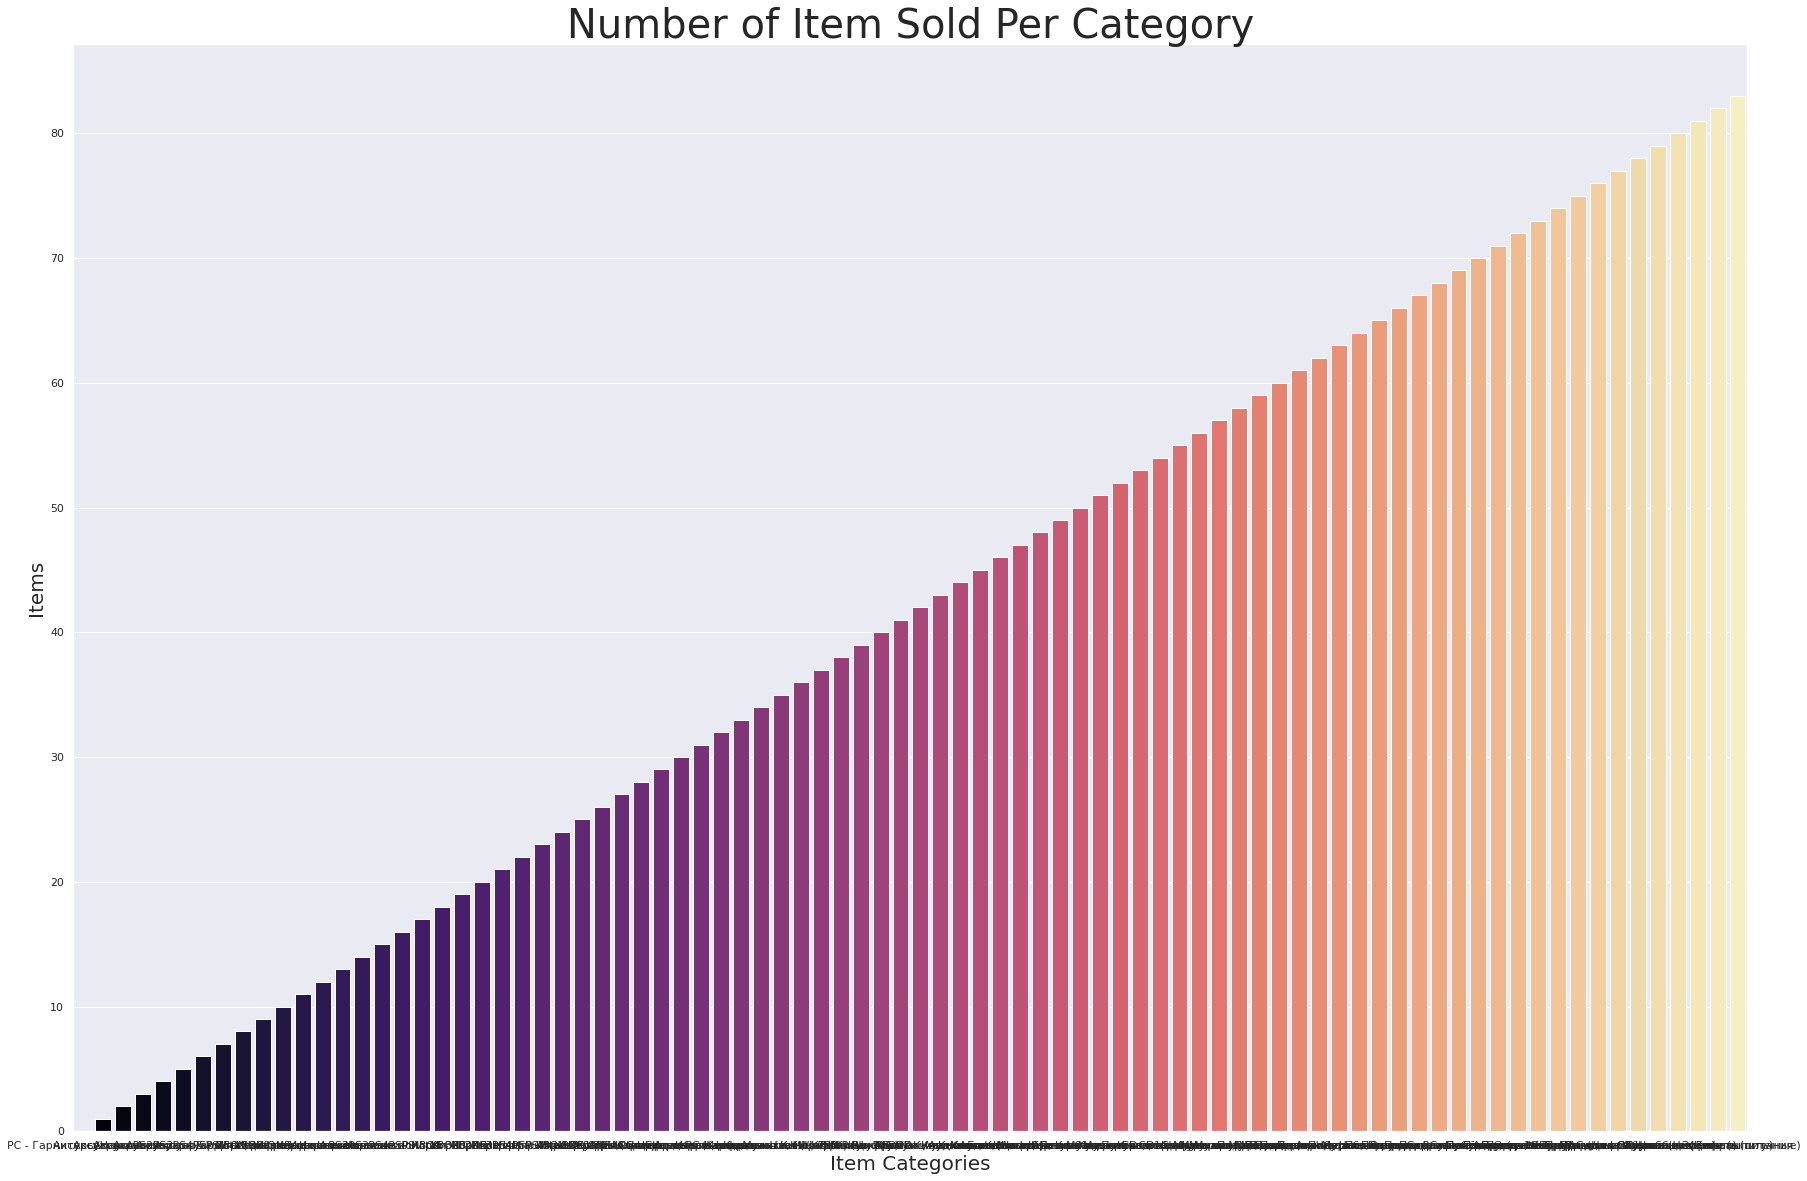

In [21]:
plt.rcParams['figure.figsize'] = (30, 20)
sns.barplot(sales_item_category['item_category_name'],sales_item['item_id'],palette='magma')
plt.title('Number of Item Sold Per Category', fontsize = 40)
plt.xlabel('Item Categories', fontsize = 20)
plt.ylabel('Items', fontsize = 20)
plt.show()

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

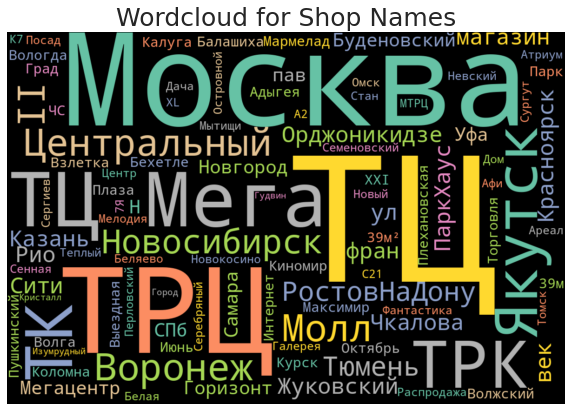

In [23]:
plt.rcParams['figure.figsize'] = (10, 10)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',
                      colormap='Set2',
                      max_words = 100, 
                      stopwords = stopwords ,
                      width = 1200,
                      height = 800,
                     random_state = 30).generate(str(sales_shops['shop_name']))


plt.title('Wordcloud for Shop Names', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

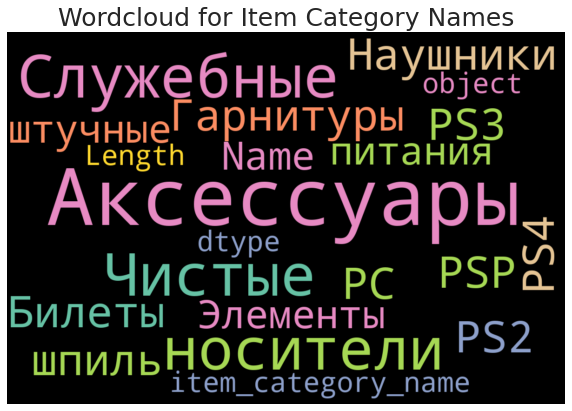

In [24]:
plt.rcParams['figure.figsize'] = (10, 10)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',
                      colormap='Set2',
                      max_words = 100, 
                      stopwords = stopwords ,
                      width = 1200,
                      height = 800,
                     random_state = 30).generate(str(sales_item_category['item_category_name']))


plt.title('Wordcloud for Item Category Names', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [25]:
## Creating Date , Month and Year 

days = []
months = []
years = []

for day in sales_dataset['date']:
    days.append(day.day)
for month in sales_dataset['date']:
    months.append(month.month)
for year in sales_dataset['date']:
    years.append(year.year)

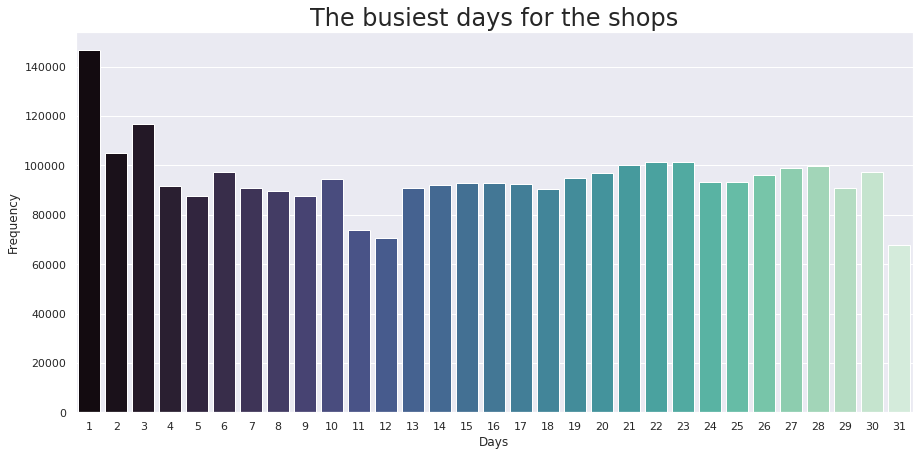

In [26]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(days, palette= 'mako')
plt.title('The busiest days for the shops', fontsize = 24)
plt.xlabel('Days', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.show()

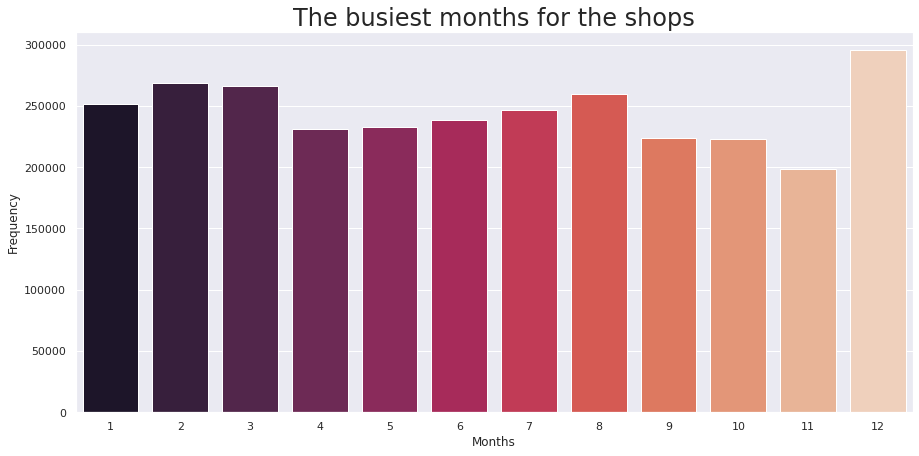

In [27]:
# busy month
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(months, palette= 'rocket')
plt.title('The busiest months for the shops', fontsize = 24)
plt.xlabel('Months', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.show()


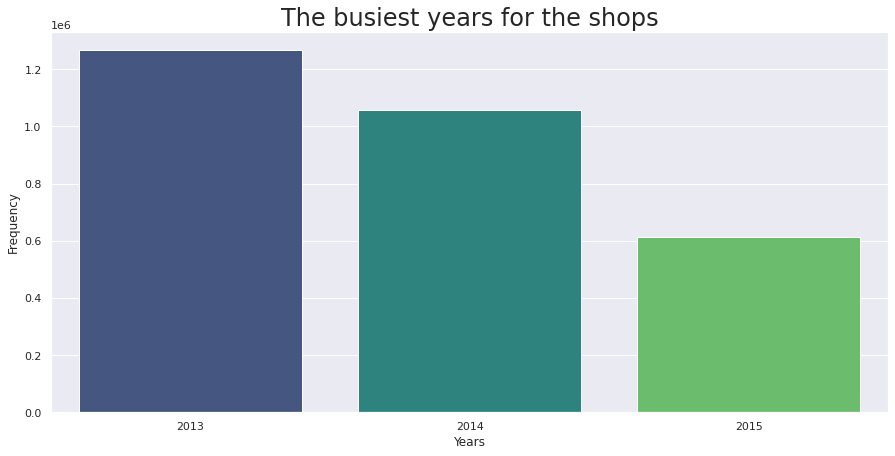

In [28]:

# busy year
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(years, palette= 'viridis')
plt.title('The busiest years for the shops', fontsize = 24)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.show()

In [29]:
sales_dataset['day'] = days
sales_dataset['month'] = months
sales_dataset['year'] = years

In [30]:
sales_dataset.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,2013-02-01,0,59,22154,999.000000,1,1,2,2013
1,2013-03-01,0,25,2552,899.000000,1,1,3,2013
2,2013-05-01,0,25,2552,899.000000,-1,1,5,2013
3,2013-06-01,0,25,2554,1709.050049,1,1,6,2013
4,2013-01-15,0,25,2555,1099.000000,1,15,1,2013


<AxesSubplot:xlabel='shop_id', ylabel='count'>

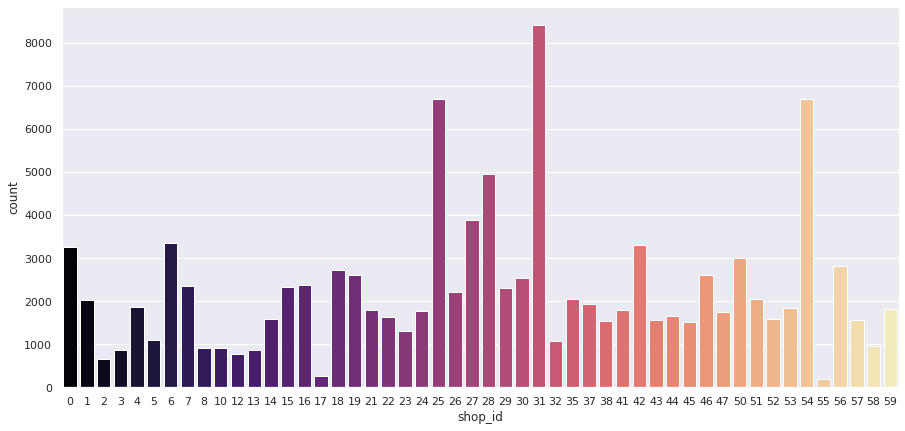

In [31]:
sns.countplot(sales_dataset[(sales_dataset.month == 2) & (sales_dataset.year == 2013)]['shop_id'], palette='magma')

<AxesSubplot:xlabel='item_price'>

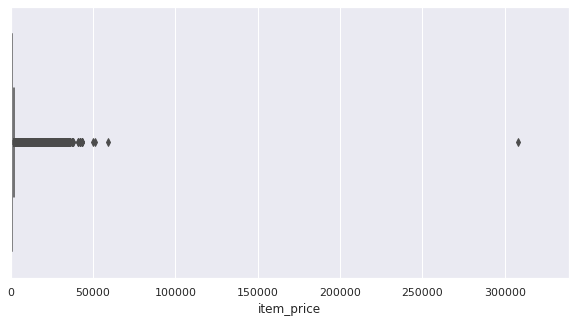

In [32]:
plt.figure(figsize=(10,5))
plt.xlim(sales_dataset.item_price.min(), sales_dataset.item_price.max()*1.1)
sns.boxplot(x=sales_dataset.item_price)

<AxesSubplot:xlabel='item_cnt_day'>

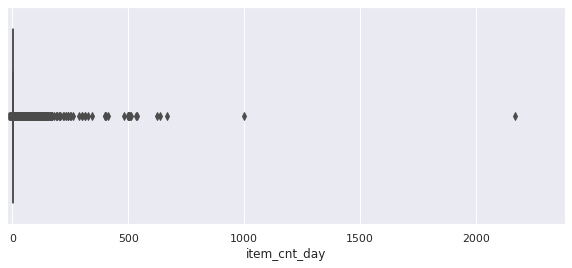

In [33]:
plt.figure(figsize=(10,4))
plt.xlim(sales_dataset.item_cnt_day.min(), sales_dataset.item_cnt_day.max()*1.1)
sns.boxplot(x=sales_dataset.item_cnt_day)

In [34]:
sales_dataset = sales_dataset[sales_dataset['item_price'] < 100000]
sales_dataset = sales_dataset[sales_dataset['item_cnt_day'] < 1200]

In [35]:
sales_dataset.shape

(2935847, 9)

In [36]:
sales_dataset[sales_dataset['item_price']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
484683,2013-05-15,4,32,2973,-1.0,1,15,5,2013


In [37]:
sales_median = sales_dataset[(sales_dataset.shop_id==32)&(sales_dataset.item_id==2973)&(sales_dataset.date_block_num==4)&(sales_dataset.item_price>0)].item_price.median()
sales_median

1874.0

In [38]:
sales_dataset["item_price"] = sales_dataset["item_price"].map(lambda x: sales_median if x<0 else x)

In [39]:
sales_dataset[sales_dataset['item_price']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year


In [40]:
sales_dataset[sales_dataset['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
2,2013-05-01,0,25,2552,899.0,-1,1,5,2013
148,2013-01-23,0,25,2321,999.0,-1,23,1,2013
175,2013-07-01,0,25,2199,1449.0,-1,1,7,2013
807,2013-02-01,0,25,2330,599.0,-1,1,2,2013
1041,2013-01-13,0,25,5034,1989.0,-1,13,1,2013
...,...,...,...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1,26,10,2015
2934462,2015-10-18,33,25,4896,6398.0,-1,18,10,2015
2935263,2015-05-10,33,25,10039,249.0,-1,10,5,2015
2935643,2015-10-16,33,25,7893,2990.0,-1,16,10,2015


In [41]:
sales_dataset['item_cnt_day'] = sales_dataset['item_cnt_day'].map(lambda x:0 if x<0 else x)


In [42]:
sales_dataset[sales_dataset['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
